In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import time
start_time = time.time()

pd.set_option('display.max_rows', 400) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format
%matplotlib inline

import statsmodels.api as sm

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jinfenggao/CASA0007-QM_Written_Investigation/main/Seoul_Apartment.csv")
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score
0,2766,37.6816,127.0566,2000-6,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000
1,5860,37.6793,127.0570,2001-5,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000
2,15564,37.6769,127.0581,2005-2,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000
3,3700,37.6753,127.0600,1995-9,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000
4,6204,37.6764,127.0584,2003-6,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000
...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-6,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000
4017,19721,37.5317,126.8296,2009-1,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000
4018,21277,37.5316,126.8286,2010-2,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000
4019,6434,37.5310,126.8671,2003-6,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000


In [206]:
data.dtypes

ID              int64
Latitude      float64
Longitude     float64
Build_Date     object
Area            int64
Households      int64
Floors          int64
Min_price     float64
Max_price     float64
Avg_price     float64
Score         float64
dtype: object

In [207]:
data.isnull().sum()

ID             0
Latitude       0
Longitude      0
Build_Date     0
Area           0
Households     0
Floors         0
Min_price     90
Max_price     90
Avg_price     90
Score          0
dtype: int64

In [208]:
import datetime as dt
data['Build_Date'] = pd.to_datetime(data['Build_Date'], format='%Y/%m')
data['Build_Year'] = data['Build_Date'].dt.year
data['Building_Age'] = 2021 - data.Build_Year
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score,Build_Year,Building_Age
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18


In [212]:
data = data[data.Latitude > 37.43]
data = data[data.Longitude < 127.14]
data = data[data.Building_Age > 0]
data = data[data.Area > 0]
data = data[data.Floors > 0]
data = data[data.Avg_price > 0]
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score,Build_Year,Building_Age,Avg_price_per
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21,438.8489
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20,485.7143
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16,470.9302
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26,338.2353
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18,439.5604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18,732.5581
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12,188.6792
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11,289.1566
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18,933.3333


In [213]:
data['Avg_price_per'] = data.Avg_price / data.Area
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score,Build_Year,Building_Age,Avg_price_per
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21,438.8489
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20,485.7143
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16,470.9302
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26,338.2353
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18,439.5604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18,732.5581
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12,188.6792
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11,289.1566
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18,933.3333


In [215]:
data = data[['Latitude', 'Longitude', 'Build_Year', 'Building_Age', 'Area', 'Households', 'Floors','Score','Avg_price']]
data

,Latitude,Longitude,Build_Year,Building_Age,Area,Households,Floors,Score,Avg_price
0,37.6816,127.0566,2000,21,139,492,42,4.3000,"61,000.0000"
1,37.6793,127.0570,2001,20,105,468,32,4.1000,"51,000.0000"
2,37.6769,127.0581,2005,16,86,57,26,4.8000,"40,500.0000"
3,37.6753,127.0600,1995,26,102,216,31,4.8000,"34,500.0000"
4,37.6764,127.0584,2003,18,91,165,28,4.8000,"40,000.0000"
...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,4.5000,"63,000.0000"
4017,37.5317,126.8296,2009,12,106,120,32,4.0000,"20,000.0000"
4018,37.5316,126.8286,2010,11,83,92,25,3.5000,"24,000.0000"
4019,37.5310,126.8671,2003,18,75,119,23,4.3000,"70,000.0000"


/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


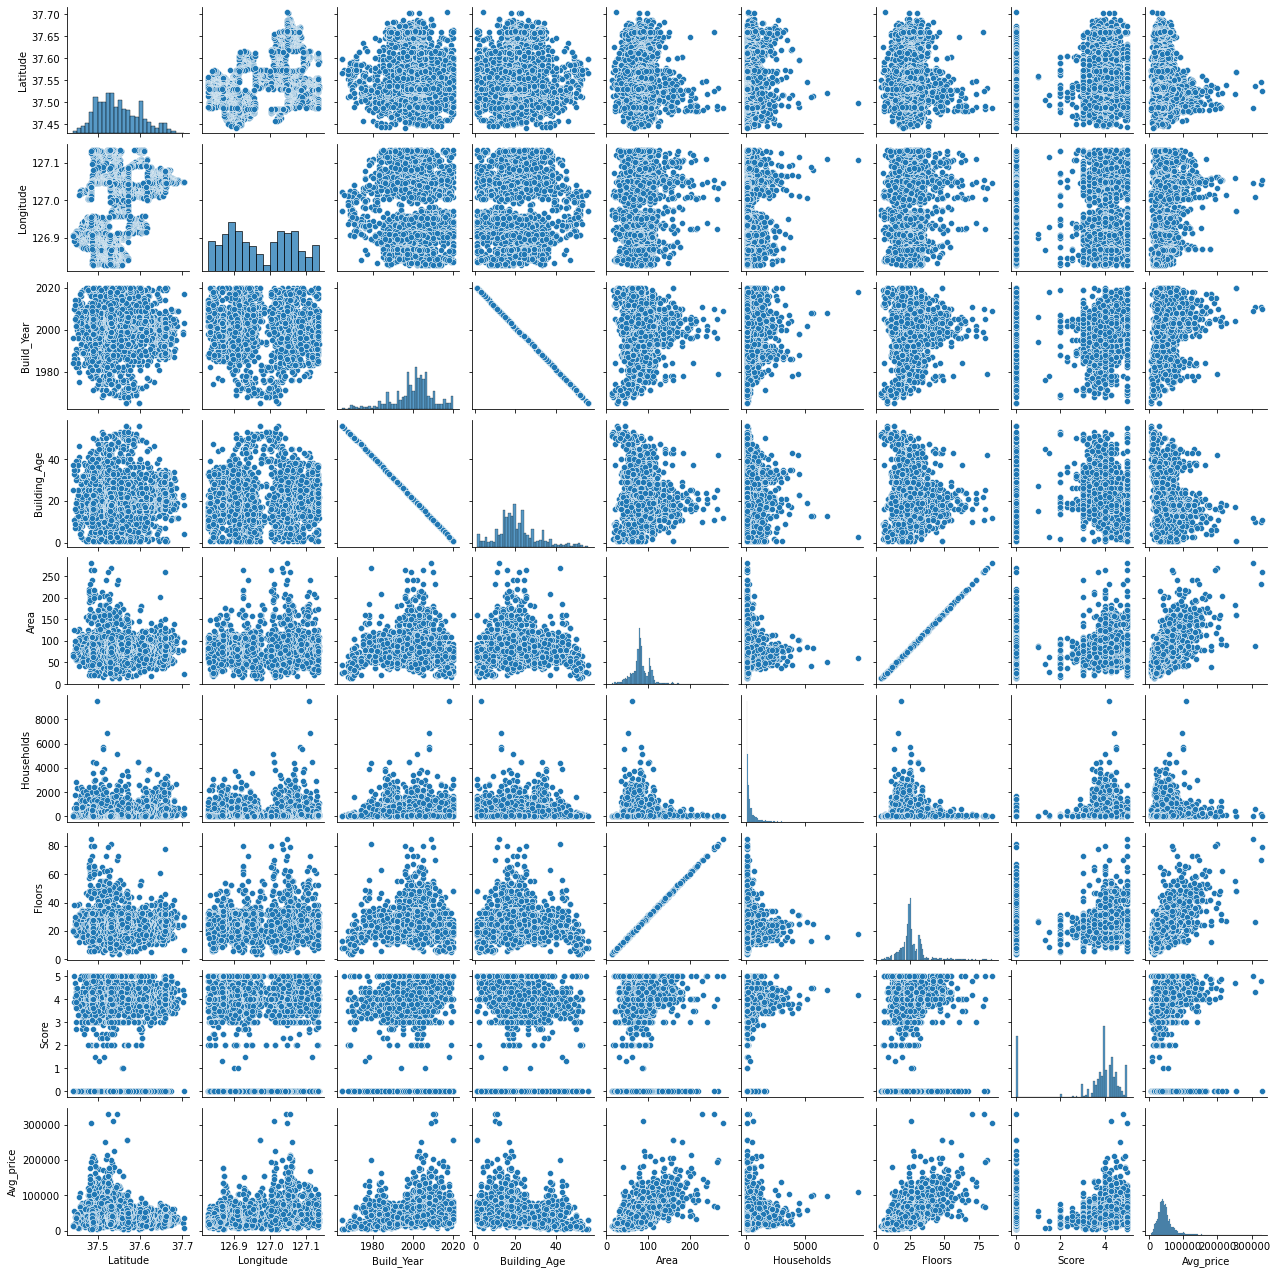

In [216]:
#Check the relationship
sns.pairplot(data, size = 2.0)

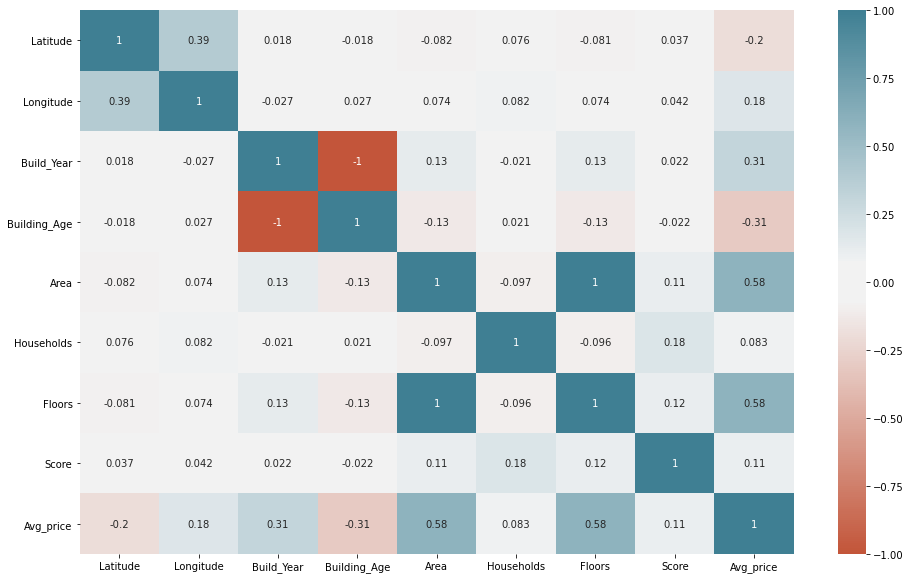

In [217]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = data.corr()

#Creating my own color palette
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)

#Display the plot
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_price', ylabel='Density'>

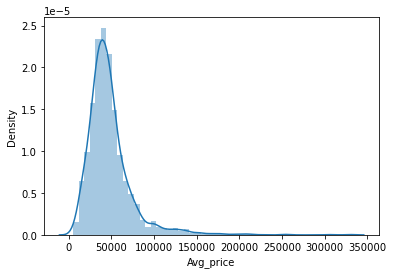

In [218]:
sns.distplot(data['Avg_price'])

In [219]:
#We need to divide dataset into a training and testing set
from sklearn.model_selection import train_test_split

In [220]:
#Remove the following columns
#CV because it will be used as the dependent variable
#The rest because I don't think they will be necessary.
x = data.drop(['Avg_price'], axis = 1)
x.head()

,Latitude,Longitude,Build_Year,Building_Age,Area,Households,Floors,Score
0,37.6816,127.0566,2000,21,139,492,42,4.3000
1,37.6793,127.0570,2001,20,105,468,32,4.1000
2,37.6769,127.0581,2005,16,86,57,26,4.8000
3,37.6753,127.0600,1995,26,102,216,31,4.8000
4,37.6764,127.0584,2003,18,91,165,28,4.8000


In [221]:
#Make y the Capital Value (CV)
y = data['Avg_price']
y.head()

0                                61,000.0000
1                                51,000.0000
2                                40,500.0000
3                                34,500.0000
4                                40,000.0000
Name: Avg_price, dtype: float64

In [222]:
#Do the train_test_split
#Using 30% of the data as the test set.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [223]:
from sklearn.linear_model import LinearRegression

#create the linear regression model
model = LinearRegression()

In [224]:
#Machine learning models can only work on numeric data, hence, we need to drop the non-numeric data.
model.fit(train_x, train_y)

LinearRegression()

In [225]:
#These are the m or the gradient from the data.
model.coef_

array([-1.38436605e+05,  7.31623344e+04,  3.69134443e+02, -3.69134443e+02,
        5.13334402e+02,  6.73206711e+00,  3.51812553e+00,  4.11342918e+02])

In [226]:
#After training the model, we can use this to predict the test dataset.
predicted = model.predict(test_x)
predicted

array([42011.39198335, 68861.49393704, 68092.16209217, ...,
       46874.23637211, 14258.17800514, 47846.31392872])

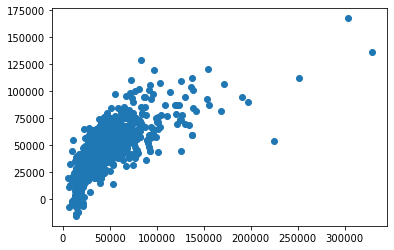

In [227]:
#Plot the predicted and the test_y and the predicted
plt.scatter(test_y, predicted)

In [228]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
regression_results(test_y, predicted)

explained_variance:  0.505
r2:  0.5048
MAE:  12714.4353
MSE:  380819137.4363
RMSE:  19514.5878


In [229]:
#The multiple R squared of the model.
model.score(test_x, test_y)

0.5047878946193334

#### Decision Tree

In [230]:
import json
import sys
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from pylab import savefig

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pydot'

In [244]:
xdt = data.drop(['Avg_price'], axis = 1)
ydt = data['Avg_price']

In [245]:
xdt_train, xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt,test_size = 0.3, random_state=1)

In [246]:
dt = DecisionTreeRegressor()
dt.fit(xdt_train, ydt_train)

DecisionTreeRegressor()

In [247]:
ydt_pred = dt.predict(xdt_test)
ydt_pred

array([65000., 44500., 61000., ..., 46000., 42000., 49500.])

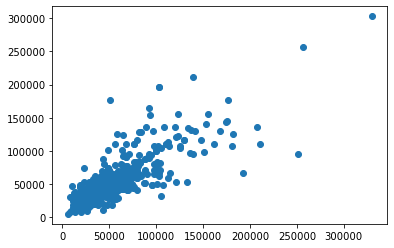

In [248]:
plt.scatter(ydt_test, ydt_pred)

In [249]:
#Evaluate the model
dt.score(xdt_test, ydt_test)

0.6751075259732371

In [250]:
dt.score(xdt_train, ydt_train)

1.0

#### Random Forest

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
#explanatory variables
xrf = data.drop(['Avg_price'], axis = 1)

#value we want to predict
yrf = data['Avg_price']

xrf_list = list(xrf.columns)

#features are X
#labels are Y
#Split the data into training and testing sets
train_xrf, test_xrf, train_yrf, test_yrf = train_test_split(xrf, yrf, test_size = 0.3, random_state = 1)

In [240]:
print('Training X Shape:', train_xrf.shape)
print('Training Y Shape:', train_yrf.shape)
print('Testing X Shape:', test_xrf.shape)
print('Testing Y Shape:', test_yrf.shape)

Training X Shape: (2594, 8)
Training Y Shape: (2594,)
Testing X Shape: (1112, 8)
Testing Y Shape: (1112,)


In [241]:
from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)

#Train the model on training data
rf.fit(train_xrf, train_yrf)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [242]:
#Use the forest's predict metod on the test data
rfPredictions = rf.predict(test_xrf)

#calculate the absolute errors
errors = abs(rfPredictions - test_yrf)

#Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 6847.29


In [243]:
#Determine Performance Metrics

#Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_yrf)

#Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round (accuracy, 2), '%.')

Accuracy: 84.84 %.


In [133]:
#Finding the best model using Root Square Mean Error Prediction (RMSEP)
from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_y.as_matrix()

AttributeError: 'Series' object has no attribute 'as_matrix'

In [129]:
#Linear Regression
y_pred_lr = predicted
mse_lr = mean_squared_error(y_true, y_pred_lr)
rmse_lr = sqrt(mse_lr)
rmse_lr

NameError: name 'y_true' is not defined

In [130]:
#Random Forest
y_pred_rf = rfPredictions
mse_rf = mean_squared_error(y_true, y_pred_rf)
rmse_rf = sqrt(mse_rf)
rmse_rf

NameError: name 'y_true' is not defined

In [377]:
data.columns.values

array(['Lattitude', 'Longtitude', 'BuildYear', 'BuildingAge', 'Area',
       'Households', 'floors', 'Avg_price', 'Score'], dtype=object)

In [378]:
data.isnull().sum()

Lattitude      0
Longtitude     0
BuildYear      0
BuildingAge    0
Area           0
Households     0
floors         0
Avg_price      0
Score          0
dtype: int64

In [379]:
data.dtypes

Lattitude      float64
Longtitude     float64
BuildYear        int64
BuildingAge      int64
Area             int64
Households       int64
floors           int64
Avg_price      float64
Score          float64
dtype: object

array([[<AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'BuildYear'}>],
       [<AxesSubplot:title={'center':'BuildingAge'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Households'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'Avg_price'}>,
        <AxesSubplot:title={'center':'Score'}>]], dtype=object)

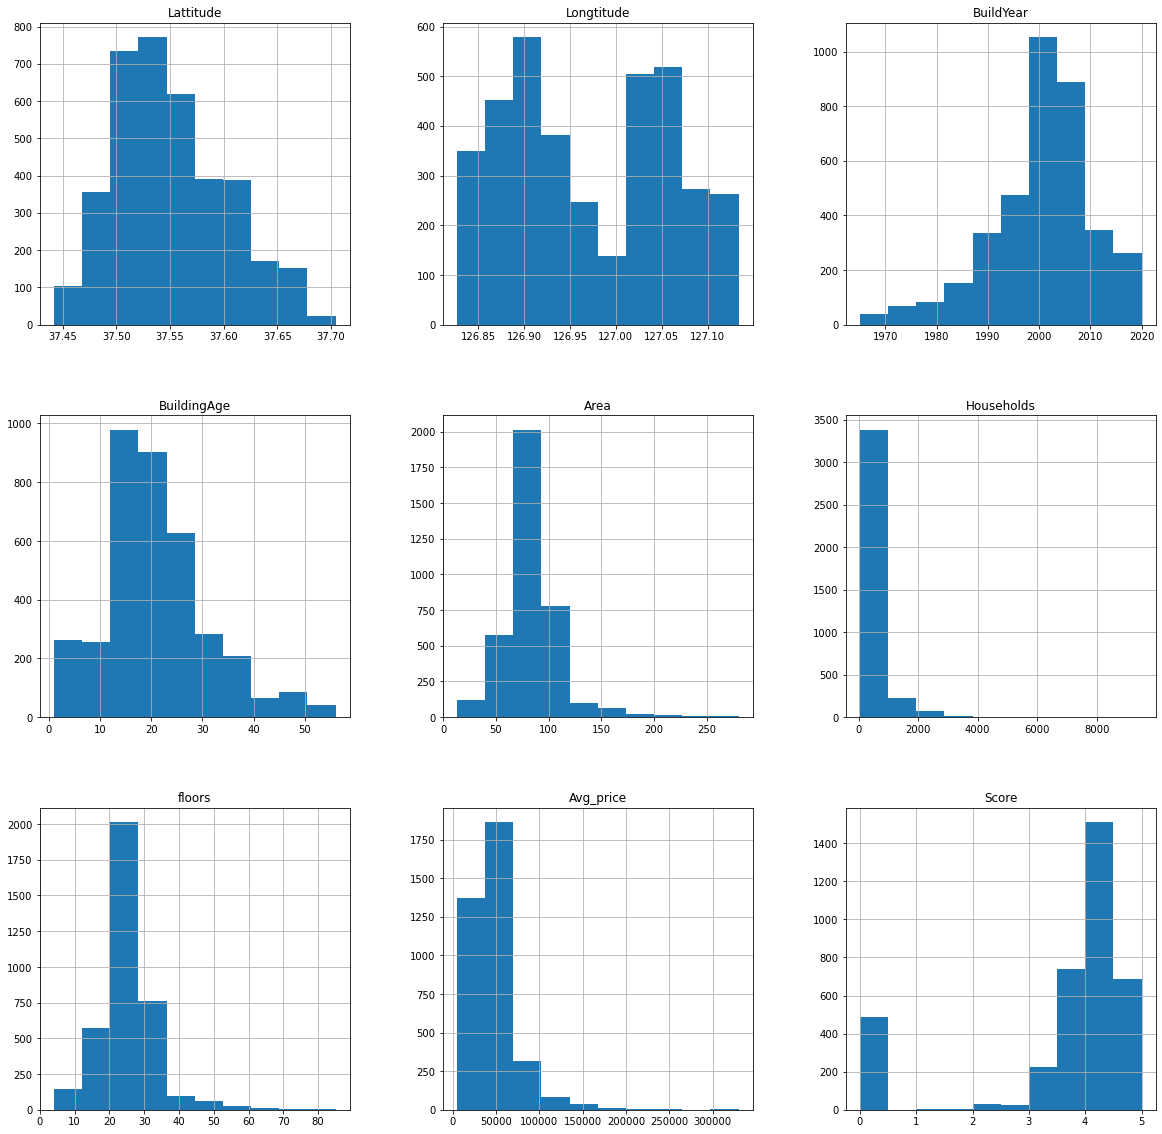

In [380]:
data.hist(figsize = (20,20))

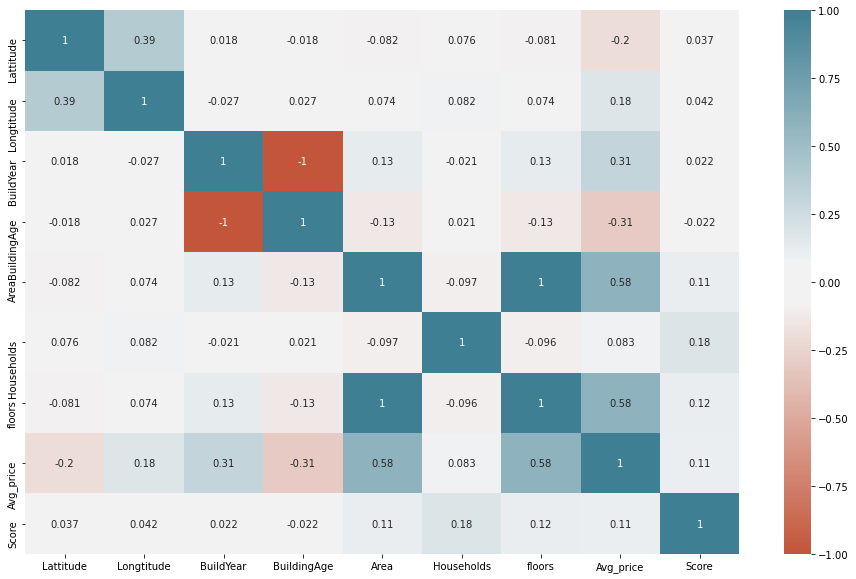

In [381]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = data.corr()

#Creating my own color palette
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)

#Display the plot
plt.show()

In [382]:
data.Avg_price.describe()

count                                 3,706.0000
mean                                 47,651.0254
std                                  27,506.6976
min                                   4,900.0000
25%                                  32,000.0000
50%                                  42,500.0000
75%                                  55,000.0000
max                                 330,000.0000
Name: Avg_price, dtype: float64

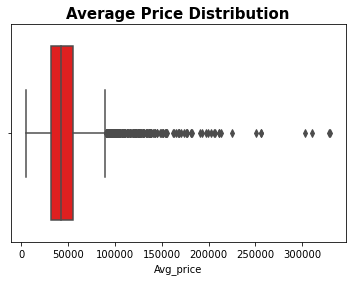

In [383]:
ax = sns.boxplot(data=data, x='Avg_price',color='red')
plt.title("Average Price Distribution",size=15, weight='bold')
plt.show()

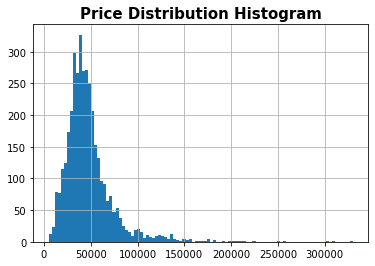

In [384]:
data['Avg_price'].hist(bins=100)
plt.title("Price Distribution Histogram",size=15, weight='bold')
plt.show()

In [385]:
data.Avg_price_per.describe()

AttributeError: 'DataFrame' object has no attribute 'Avg_price_per'

In [ ]:
ax = sns.boxplot(data=data, x='Avg_price_per',color='red')
plt.title("Average Price per Square Meter Distribution",size=15, weight='bold')
plt.show()

In [ ]:
data['Avg_price_per'].hist(bins=100)
plt.title("Average Price per Square Meter Histogram",size=15, weight='bold')
plt.show()

In [ ]:
test1 = pd.DataFrame({'High_Avg_price':data['Avg_price']>=np.percentile(data['Avg_price'],70)})
test1['High_Avg_price'].value_counts()

In [ ]:
test = pd.concat( [data, test1], axis = 1)
test

In [386]:
test['High_Avg_price'].value_counts()

False    2562
True     1144
Name: High_Avg_price, dtype: int64

In [387]:
from sklearn.preprocessing import LabelEncoder

In [388]:
le = LabelEncoder()
le.fit([True, False])
labels_fea = le.transform(test['High_Avg_price'])
labels_fea

array([1, 0, 0, ..., 0, 1, 0])

In [389]:
pd.Series(labels_fea).value_counts()

0    2562
1    1144
dtype: int64

In [390]:
from sklearn.feature_extraction import DictVectorizer

In [391]:
A = test.drop(['Avg_price','High_Avg_price'],axis = 1)
y = data['Avg_price']
y

0                                   61,000.0000
1                                   51,000.0000
2                                   40,500.0000
3                                   34,500.0000
4                                   40,000.0000
                         ...                   
4016                                63,000.0000
4017                                20,000.0000
4018                                24,000.0000
4019                                70,000.0000
4020                                19,500.0000
Name: Avg_price, Length: 3706, dtype: float64

In [392]:
A_dict = A.to_dict('records')
print(A_dict[1])

{'Lattitude': 37.6792898, 'Longtitude': 127.0570207, 'BuildYear': 2001, 'BuildingAge': 20, 'Area': 105, 'Households': 468, 'floors': 32, 'Score': 4.1}


In [393]:
vec = DictVectorizer()
A_vec_array = vec.fit_transform(A_dict).toarray()
A_vec_array.shape
A_vec_array

array([[ 139.       , 2000.       ,   21.       , ...,  127.0565917,
           4.3      ,   42.       ],
       [ 105.       , 2001.       ,   20.       , ...,  127.0570207,
           4.1      ,   32.       ],
       [  86.       , 2005.       ,   16.       , ...,  127.0580753,
           4.8      ,   26.       ],
       ...,
       [  83.       , 2010.       ,   11.       , ...,  126.8286106,
           3.5      ,   25.       ],
       [  75.       , 2003.       ,   18.       , ...,  126.8670965,
           4.3      ,   23.       ],
       [  50.       , 2006.       ,   15.       , ...,  126.829991 ,
           4.       ,   15.       ]])

In [394]:
print(vec.feature_names_[0:5])
print(vec.vocabulary_)

['Area', 'BuildYear', 'BuildingAge', 'Households', 'Lattitude']
{'Lattitude': 4, 'Longtitude': 5, 'BuildYear': 1, 'BuildingAge': 2, 'Area': 0, 'Households': 3, 'floors': 7, 'Score': 6}


In [395]:
from sklearn.model_selection import train_test_split
train_d, test_d, train_lab, test_lab = train_test_split(A_vec_array, labels_fea, test_size = 0.3)

In [396]:
print(train_d.shape)
print(test_d.shape)

(2594, 8)
(1112, 8)


In [397]:
len(train_d),len(test_d),len(train_lab),len(test_lab)

(2594, 1112, 2594, 1112)

In [398]:
test_ = test.copy()
gdf = gpd.GeoDataFrame(test_, geometry=gpd.points_from_xy(test_.Longtitude, test_.Lattitude, crs='epsg:4326'))

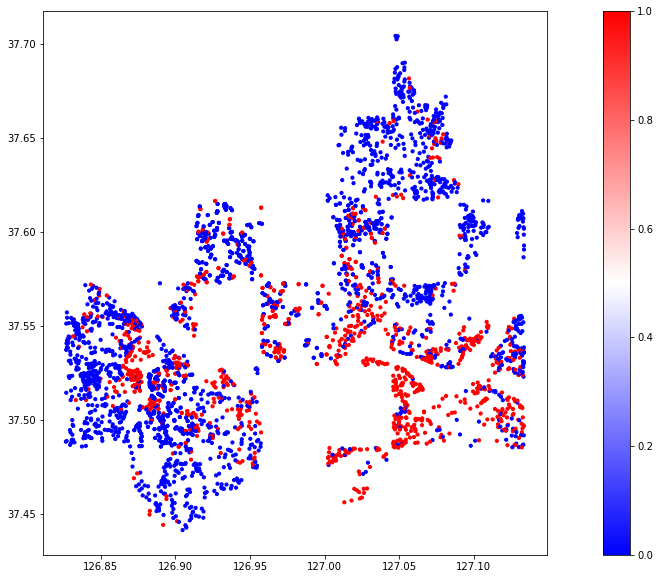

In [399]:
ax=gdf.plot(column='High_Avg_price', legend=True, markersize=10 ,figsize=(20,10), cmap='bwr', alpha=1)

In [400]:
reg_data = data.drop([], axis = 1)

In [401]:
data_numeric = pd.get_dummies(reg_data)
data_numeric

,Lattitude,Longtitude,BuildYear,BuildingAge,Area,Households,floors,Avg_price,Score
0,37.6816,127.0566,2000,21,139,492,42,"61,000.0000",4.3000
1,37.6793,127.0570,2001,20,105,468,32,"51,000.0000",4.1000
2,37.6769,127.0581,2005,16,86,57,26,"40,500.0000",4.8000
3,37.6753,127.0600,1995,26,102,216,31,"34,500.0000",4.8000
4,37.6764,127.0584,2003,18,91,165,28,"40,000.0000",4.8000
...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,"63,000.0000",4.5000
4017,37.5317,126.8296,2009,12,106,120,32,"20,000.0000",4.0000
4018,37.5316,126.8286,2010,11,83,92,25,"24,000.0000",3.5000
4019,37.5310,126.8671,2003,18,75,119,23,"70,000.0000",4.3000


In [402]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lattitude    3706 non-null   float64
 1   Longtitude   3706 non-null   float64
 2   BuildYear    3706 non-null   int64  
 3   BuildingAge  3706 non-null   int64  
 4   Area         3706 non-null   int64  
 5   Households   3706 non-null   int64  
 6   floors       3706 non-null   int64  
 7   Avg_price    3706 non-null   float64
 8   Score        3706 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 289.5 KB


In [403]:
data_numeric.columns.values

array(['Lattitude', 'Longtitude', 'BuildYear', 'BuildingAge', 'Area',
       'Households', 'floors', 'Avg_price', 'Score'], dtype=object)

In [404]:
predictors_data = data_numeric.drop('Avg_price', axis=1)
response_data = data_numeric['Avg_price']

In [405]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(predictors_data)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     501.6
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:16:13   Log-Likelihood:                -41905.
No. Observations:                3706   AIC:                         8.383e+04
Df Residuals:                    3698   BIC:                         8.387e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.3246      0.233     -9.993      0.000      -2.781      -1.868
Lattitude   -1.406e+05   6900.299    -20.372      0.000   -1.54e+05   -1.27e+05
Longtitude    7.35e+04   4015.982     18.303      0.000    6.56e+04    8.14e+04
BuildYear   -1999.1815    234.014     -8.543      0.000   -2457.991   -1540.372
BuildingAge -2698.7527    237.216    -11.377      0.000   -3163.841   -2233.665
Area          570.3065    343.616      1.660      0.097    -103.389    1244.002
Households      6.7532      0.600     11.251      0.000       5.576       7.930
floors       -145.0047   1135.931     -0.128      0.898   -2372.117    2082.108
Score         298.5360    227.459      1.312      0.189    -147.422     744.494
==============================================================================
Omnibus:                     2514.477   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67959.111
Skew:                           2.842   Prob(JB):                         0.00
Kurtosis:                      23.194   Cond. No.                     4.85e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [406]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [407]:
#select columns to keep even if they have super high VIF score
list_var_not_to_remove = ['Area']
df_predictors_select_VIF = drop_column_using_vif_(predictors_data, list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: inf
Dropping: BuildYear
Max VIF: 828.8287173594734
Dropping: floors
Max VIF: 1.1987351014420324
The columns remaining after VIF selection are:
Index(['Lattitude', 'Longtitude', 'BuildingAge', 'Area', 'Households',
       'Score'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [439]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     585.3
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:34:18   Log-Likelihood:                -41905.
No. Observations:                3706   AIC:                         8.382e+04
Df Residuals:                    3699   BIC:                         8.387e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.04e+06   4.73e+05     -8.544      0.000   -4.97e+06   -3.11e+06
Lattitude   -1.406e+05   6899.291    -20.375      0.000   -1.54e+05   -1.27e+05
Longtitude    7.35e+04   4015.448     18.305      0.000    6.56e+04    8.14e+04
BuildingAge  -699.6095     32.660    -21.421      0.000    -763.642    -635.577
Area          526.4712     12.336     42.679      0.000     502.286     550.657
Households      6.7508      0.600     11.254      0.000       5.575       7.927
Score         297.8197    227.360      1.310      0.190    -147.944     743.583
==============================================================================
Omnibus:                     2514.814   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67991.169
Skew:                           2.842   Prob(JB):                         0.00
Kurtosis:                      23.199   Cond. No.                     9.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [457]:
RF_train_d, RF_test_d, RF_train_lab, RF_test_lab = train_test_split(predictors_data, response_data, test_size = 0.3)

In [458]:
from sklearn.ensemble import RandomForestRegressor

#function to evaluate model performance
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels) #this is the MAE
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#evaluate the base model first
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(RF_train_d, RF_train_lab)
base_accuracy = evaluate(base_model, RF_test_d, RF_test_lab)

Model Performance
Average Error: 8224.3615 degrees.
Accuracy = 81.76%.


In [459]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20],
    'max_features': [3,4,5,6,7],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [460]:
best_grid = RandomForestRegressor(max_depth=20, max_features=7, n_estimators=1000)
best_grid.fit(RF_train_d, RF_train_lab)
grid_accuracy = evaluate(best_grid, RF_test_d, RF_test_lab)

Model Performance
Average Error: 7502.3061 degrees.
Accuracy = 83.02%.


In [461]:
feature_importances_rfreg = pd.DataFrame(best_grid.feature_importances_,
                                  index= predictors_data.columns.values,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rfreg.head(15)

,importance
Area,0.2917
Lattitude,0.1583
Longtitude,0.1416
floors,0.1278
Households,0.0944
BuildingAge,0.0749
BuildYear,0.0735
Score,0.0378


In [414]:
from sklearn.neighbors import KNeighborsClassifier

In [415]:
params = {"n_neighbors" : range(1, 70)}
gridsearch = GridSearchCV(KNeighborsClassifier(), params)
gridsearch.fit(train_d, train_lab)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 70)})

In [416]:
gridsearch.best_params_

{'n_neighbors': 2}

In [417]:
knn = KNeighborsClassifier(n_neighbors=5)  #uses the parameters found by GridSearch
knn.fit(train_d, train_lab)

KNeighborsClassifier()

In [418]:
knn.score(test_d, test_lab)

0.7643884892086331

In [419]:
predictions = knn.predict(test_d)

In [420]:
from sklearn import metrics
print("Classifcation accuracy: ")
print(metrics.accuracy_score(test_lab, predictions))

Classifcation accuracy: 
0.7643884892086331


In [421]:
print("Classification results: ")
print(metrics.classification_report(test_lab, predictions))

Classification results: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       774
           1       0.65      0.49      0.56       338

    accuracy                           0.76      1112
   macro avg       0.72      0.69      0.70      1112
weighted avg       0.75      0.76      0.75      1112



In [422]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=40)
dtree.fit(train_d, train_lab)

DecisionTreeClassifier(random_state=40)

In [423]:
dtree.score(test_d, test_lab)

0.8489208633093526

In [424]:
predictions_dtree = dtree.predict(test_d)

In [425]:
print (metrics.classification_report(test_lab, predictions_dtree))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       774
           1       0.74      0.78      0.76       338

    accuracy                           0.85      1112
   macro avg       0.82      0.83      0.82      1112
weighted avg       0.85      0.85      0.85      1112



In [426]:
feature_importances_dtree = pd.DataFrame(dtree.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dtree.head(15)

,importance
Area,0.2219
Lattitude,0.2165
Longtitude,0.1786
Households,0.1548
BuildingAge,0.0985
Score,0.0762
BuildYear,0.0334
floors,0.0203


In [427]:
#for selecting parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
#for cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [428]:
# values of n_estimators
parameters = {'n_estimators':[50, 100, 200, 300, 400]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'n_estimators': [50, 100, 200, 300, 400]})

In [429]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 200}
The best score is: 
0.8955282284762053


In [430]:
#now try finding the optimal depth
parameters = {'max_depth':[5,10,15,20]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': [5, 10, 15, 20]})

In [431]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 20}
The best score is: 
0.8932138579537423


In [432]:
forest1=RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)
forest1.fit(train_d,train_lab)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=40)

In [433]:
forest1.score(test_d, test_lab)

0.908273381294964

In [434]:
predictions_rf = forest1.predict(test_d)

In [435]:
print (metrics.classification_report(test_lab, predictions_rf))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       774
           1       0.88      0.80      0.84       338

    accuracy                           0.91      1112
   macro avg       0.90      0.88      0.89      1112
weighted avg       0.91      0.91      0.91      1112



In [436]:
# number of fold as 5
cv_fold=5

clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)

# call the cross_val_score function
scores = cross_val_score(clf, train_d, train_lab, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.89210019 0.89595376 0.89595376 0.89595376 0.89382239]
Accuracy: 0.89 (+/- 0.00)


In [437]:
feature_importances = pd.DataFrame(forest1.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(15)

,importance
Lattitude,0.1813
Longtitude,0.1571
Area,0.1553
Households,0.1328
floors,0.1074
Score,0.0895
BuildingAge,0.0894
BuildYear,0.0871
